# Two Sigma Connect: Rental Listing Inquiries
## محمدرضا کیانی
###۸۱۰۱۹۴۳۸۸

In [0]:
!pwd

/content


&#x202b;
ابتدا سعی می‌کنم با ورود کلید کگل داده‌ها را دانلود کنم.

In [0]:
!echo '{"username":"mrezakiani","key":"d998109b1aee1f9fd54235519c990979"}' > ~/.kaggle/kaggle.json

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions list

ref                                                deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                   2030-01-01 00:00:00  Getting Started  Knowledge       3069           False  
titanic                                            2030-01-01 00:00:00  Getting Started  Knowledge      11403           False  
house-prices-advanced-regression-techniques        2030-01-01 00:00:00  Getting Started  Knowledge       4611           False  
imagenet-object-localization-challenge             2029-12-31 07:00:00  Research         Knowledge         44           False  
competitive-data-science-predict-future-sales      2019-12-31 23:59:00  Playground           Kudos       3516            True  
open-images-2019-object-detection                  2019-10-01 23:59:00  Research           $25,000      

In [0]:
!kaggle competitions download -c two-sigma-connect-rental-listing-inquiries

train.json.zip: Skipping, found more recently modified local copy (use --force to force download)
test.json.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
images_sample.zip: Skipping, found more recently modified local copy (use --force to force download)
Kaggle-renthop.torrent: Skipping, found more recently modified local copy (use --force to force download)


&#x202b;
داده‌ها به شکل زیپ دانلود می‌شوند و ولازم است که اکسترکت شوند.

In [0]:
!unzip test.json.zip
!unzip train.json.zip
!unzip sample_submission.csv.zip
!unzip images_sample.zip

&#x202b;
سپس داده‌ها را در گوگل درایو خود ذخیره می‌کنم تا بعد‌ها دیگر نیازی به دانلود داده نباشد.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!mkdir /content/gdrive/My\ Drive/Colab\ Notebooks/kaggle

&#x202b;
انتقال داده‌ها از کولب به گوگل درایو (تنها سری اول این اتفاق می‌افتد)

In [0]:
!cp -r test.json train.json sample_submission.csv sample_data/ /content/gdrive/My\ Drive/Colab\ Notebooks/kaggle

cp: cannot stat 'test.json': No such file or directory
cp: cannot stat 'train.json': No such file or directory
cp: cannot stat 'sample_submission.csv': No such file or directory
^C


&#x202b;
انتقال داده‌ها از گوگل درایو به کولب (سری‌ها بعد)

In [0]:
!cp -r /content/gdrive/My\ Drive/Colab\ Notebooks/kaggle/test.json /content/gdrive/My\ Drive/Colab\ Notebooks/kaggle/train.json /content/gdrive/My\ Drive/Colab\ Notebooks/kaggle/sample_submission.csv /content/gdrive/My\ Drive/Colab\ Notebooks/kaggle/sample_data/ ./

## بررسی داده‌ها

In [0]:
import pandas as pd

In [0]:
train = pd.read_json('train.json')
print("train length:", len(train))
train.head()

train length: 49352


,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,low
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,high
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,low
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,low


In [0]:
test = pd.read_json('test.json')
print("test length:", len(test))
test.head()

test length: 74659


,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street
1000,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11 06:17:35,Step into this fantastic new Construction in t...,South Third Street\r,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",40.7109,7143442,-73.9571,0b9d5db96db8472d7aeb67c67338c4d2,[https://photos.renthop.com/2/7143442_0879e9e0...,3300,251 South Third Street\r
100000,2.0,2,6134e7c4dd1a98d9aee36623c9872b49,2016-04-12 05:24:17,"~Take a stroll in Central Park, enjoy the ente...","Midtown West, 8th Ave","[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.7650,6860601,-73.9845,b5eda0eb31b042ce2124fd9e9fcfce2f,[https://photos.renthop.com/2/6860601_c96164d8...,4900,260 West 54th Street


&#x202b;
اضافه کردن کتاب‌خانه‌های مورد نیاز

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## Overview

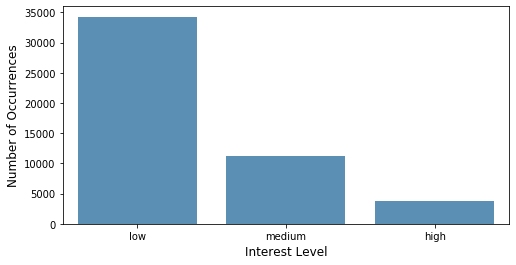

In [0]:
int_level = train['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest Level', fontsize=12)
plt.show()

## Numerical Features:
* bathrooms
* bedrooms
* price
* latitude
* longtitude

### Bathrooms

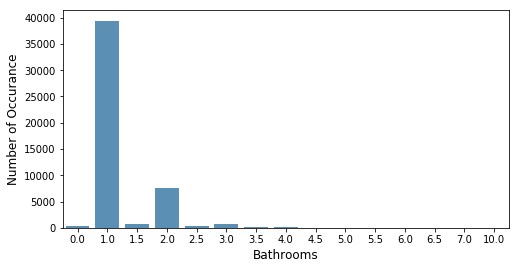

In [0]:
feature_cnt = train['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(feature_cnt.index, feature_cnt.values, alpha=0.8, color=color[0])
plt.xlabel('Bathrooms', fontsize=12)
plt.ylabel('Number of Occurance', fontsize=12)
plt.show()

&#x202b;
با توجه به کم بودن خانه‌های با تعداد سرویس بهداشتی بزرگ‌تر از ۳، تمام آن حالات را برای نرمال سازی ۳ در نظر می‌گیریم.

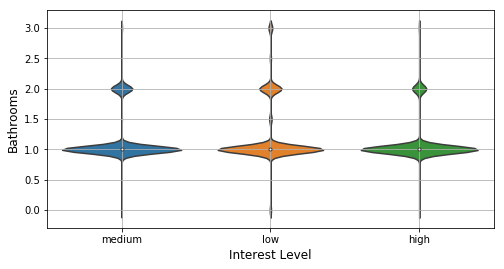

In [0]:
train.loc[train['bathrooms'] > 3, ['bathrooms']] = 3

plt.figure(figsize=(8,4))
sns.violinplot(x='interest_level', y='bathrooms', data=train)
plt.xlabel('Interest Level', fontsize=12)
plt.ylabel('Bathrooms', fontsize=12)
plt.grid()
plt.show()

### Bedrooms

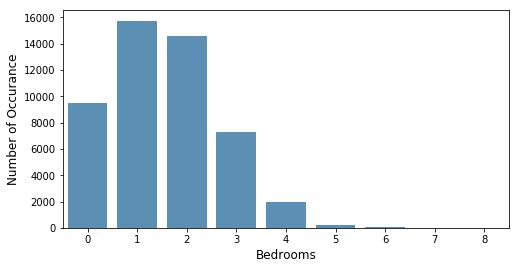

In [0]:
feature_cnt = train['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(feature_cnt.index, feature_cnt.values, alpha=0.8, color=color[0])
plt.xlabel('Bedrooms', fontsize=12)
plt.ylabel('Number of Occurance', fontsize=12)
plt.show()

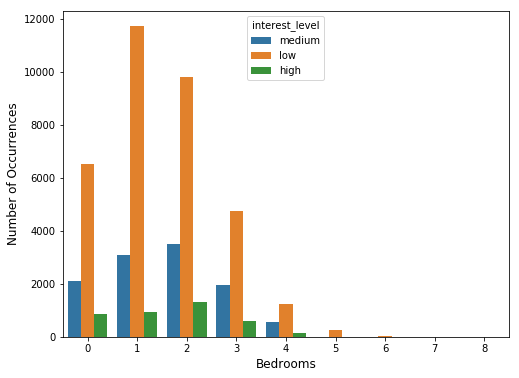

In [0]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=train)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Bedrooms', fontsize=12)
plt.show()

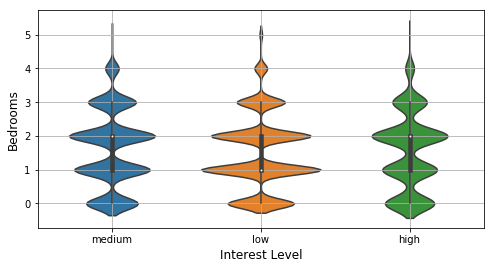

In [0]:
analyse_df = train[train['bedrooms'] < 6]

plt.figure(figsize=(8,4))
sns.violinplot(x='interest_level', y='bedrooms', data=analyse_df)
plt.xlabel('Interest Level', fontsize=12)
plt.ylabel('Bedrooms', fontsize=12)
plt.grid()
plt.show()

### Price

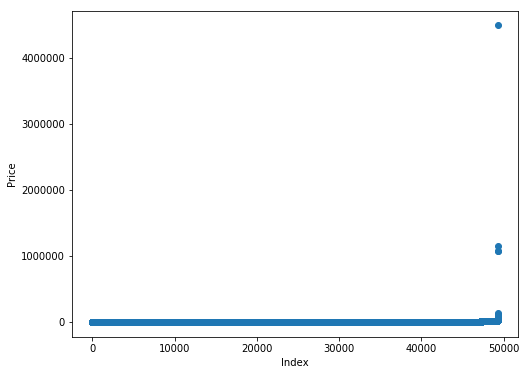

In [0]:
plt.figure(figsize=(8, 6))
plt.scatter(range(train.shape[0]), train.price.sort_values())
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

&#x202b;
برخی قیمت‌ها داده‌های پرت هستند که آن‌ها را فیلتر می‌کنم.

In [0]:
up_price = train.quantile(0.99).price
train.loc[train['price'] > up_price, ['price']] = up_price

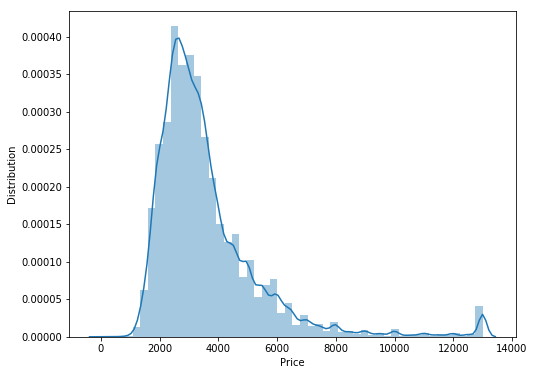

In [0]:
plt.figure(figsize=(8, 6))
sns.distplot(train.price.values, bins=50, kde=True)
plt.xlabel('Price')
plt.ylabel('Distribution')
plt.show()

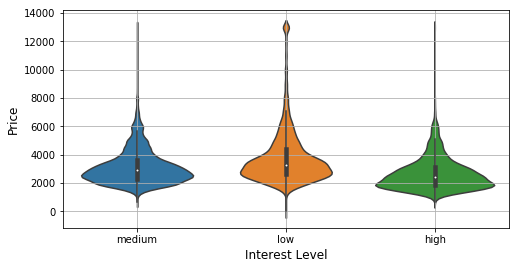

In [0]:
# analyse_df = train[train['price'] < 6]

plt.figure(figsize=(8,4))
sns.violinplot(x='interest_level', y='price', data=train)
plt.xlabel('Interest Level', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid()
plt.show()

### Price per Rooms

&#x202b;
با توجه به این که داده‌ها حالت مستقلی از یکدیگر دارند، در این بخش یک حالت نسبی از داده‌ها را مقایسه کردم که نسبت هزینه‌ی آن‌ها به تعداد اتاق‌هایشان بود ولی باز به نتایج یکسانی رسیدم

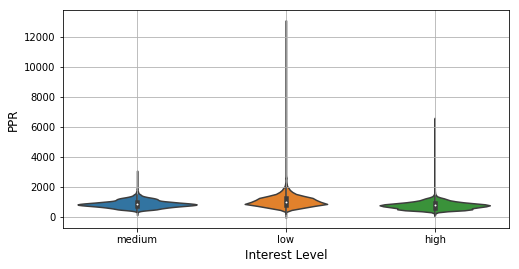

In [0]:
train['ppr'] = train['price'] / (train['bathrooms'] + train['bedrooms'] + 1)

plt.figure(figsize=(8,4))
sns.violinplot(x='interest_level', y='ppr', data=train)
plt.xlabel('Interest Level', fontsize=12)
plt.ylabel('PPR', fontsize=12)
plt.grid()
plt.show()

### Latitude & Longitude

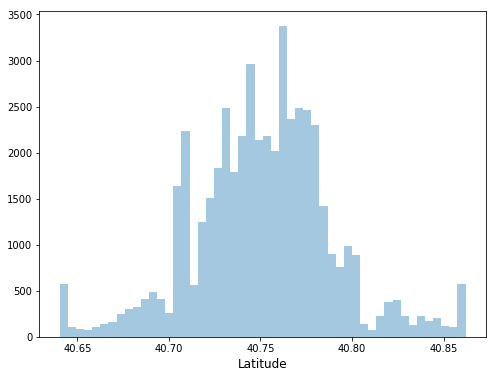

In [0]:
up_latitude = train.quantile(0.99).latitude
low_latitude = train.quantile(0.01).latitude
train.loc[train['latitude'] > up_latitude, ['latitude']] = up_latitude
train.loc[train['latitude'] < low_latitude, ['latitude']] = low_latitude

plt.figure(figsize=(8,6))
sns.distplot(train.latitude.values, bins=50, kde=False)
plt.xlabel('Latitude', fontsize=12)
plt.show()

&#x202b;
بنابراین رنج  Latitude از حدود ۴۰.۶ تا حدود ۴۰.۹۰ است.

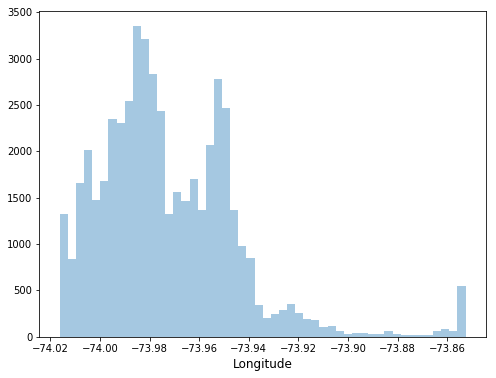

In [0]:
up_longitude = train.quantile(0.99).longitude
low_longitude = train.quantile(0.01).longitude
train.loc[train['longitude'] > up_longitude, ['longitude']] = up_longitude
train.loc[train['longitude'] < low_longitude, ['longitude']] = low_longitude

plt.figure(figsize=(8,6))
sns.distplot(train.longitude.values, bins=50, kde=False)
plt.xlabel('Longitude', fontsize=12)
plt.show()

&#x202b;
بنابراین رنج تغییرات Longitude از حدود ۷۳.۸ تا تا ۷۴.۰۲ می‌باشد.
<br>
&#x202b;
این یعنی شهر نیویورک آمریکا


### Created Date


In [0]:
train['created'] = pd.to_datetime(train['created'])
train['date_created'] = train['created'].dt.date
date_feature_count = train['date_created'].value_counts()

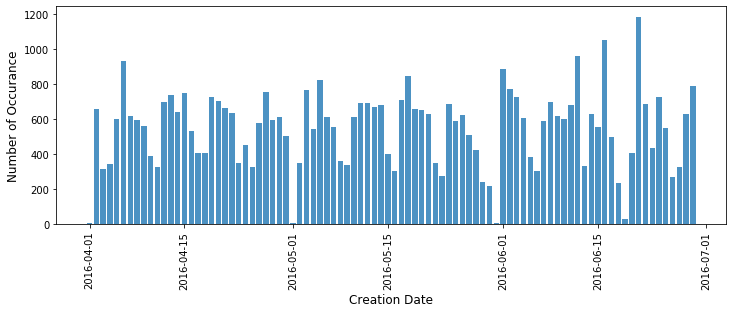

In [0]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(date_feature_count.index, date_feature_count.values, alpha=0.8)
ax.xaxis_date()
ax.set_xlabel('Creation Date', fontsize=12)
ax.set_ylabel('Number of Occurance', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

&#x202b;
بنابر این تمام آگهی‌ها مربوط به ابتدای ماه April سال 2016 تا ابتدای ماه July ۲۰۱۶ می‌باشد یعنی ۳ ماه 

&#x202b;
حال زمان ساعتی ایجاد آگهی‌ها را می‌بینیم:

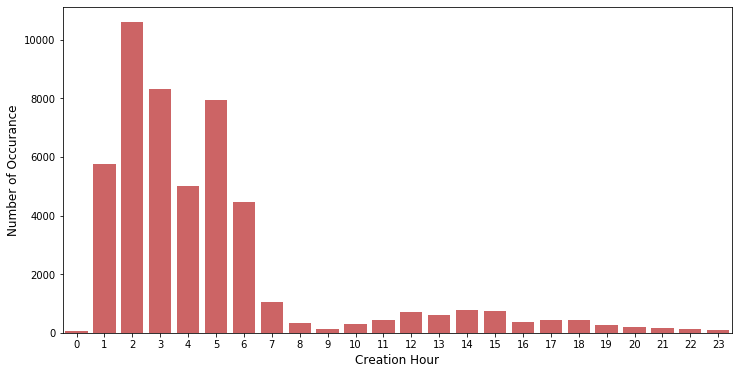

In [0]:
train['hour_created'] = train['created'].dt.hour
hour_feature_count = train['hour_created'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(hour_feature_count.index, hour_feature_count.values, alpha=0.8, color=color[3])
plt.xlabel('Creation Hour', fontsize=12)
plt.ylabel('Number of Occurance', fontsize=12)
plt.show()

&#x202b;
بنابراین اکثر تبلیغات از ساعت ۱ تا ۶ صبح ساخته می‌شوند.

### Display Address

In [0]:
address_count = train.groupby('display_address')['display_address'].count()
for i in [2, 10, 50, 100, 500]:
    print('display_address that appear less than {} times: {}%'.format(i, round((address_count < i).mean() * 100, 2)))

display_address that appear less than 2 times: 63.22%
display_address that appear less than 10 times: 89.6%
display_address that appear less than 50 times: 97.73%
display_address that appear less than 100 times: 99.26%
display_address that appear less than 500 times: 100.0%


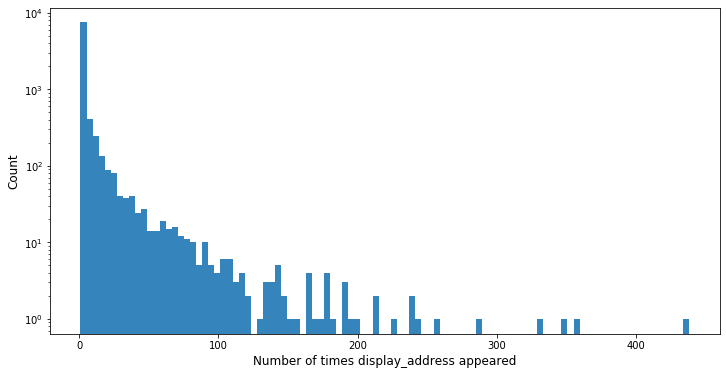

In [0]:
plt.figure(figsize=(12, 6))
plt.hist(address_count.values, bins=100, log=True, alpha=0.9)
plt.xlabel('Number of times display_address appeared', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### Number of Photos

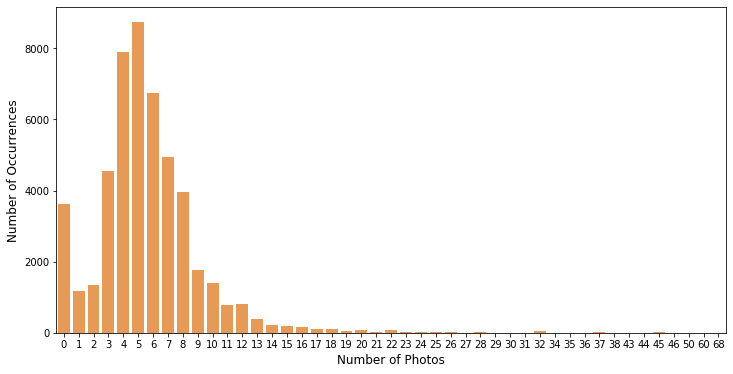

In [0]:
train['photos_cnt'] = train['photos'].apply(len)
photos_cnt = train['photos_cnt'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(photos_cnt.index, photos_cnt.values, alpha=0.8, color=color[1])
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

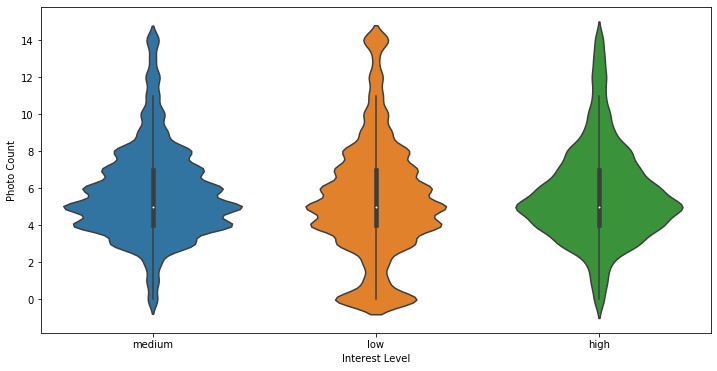

In [0]:
train.loc[train['photos_cnt'] > 14, ['photos_cnt']] = 14

plt.figure(figsize=(12,6))
sns.violinplot(x='interest_level', y='photos_cnt', data=train)
plt.xlabel('Interest Level')
plt.ylabel('Photos Count')
plt.show()

### Features Count

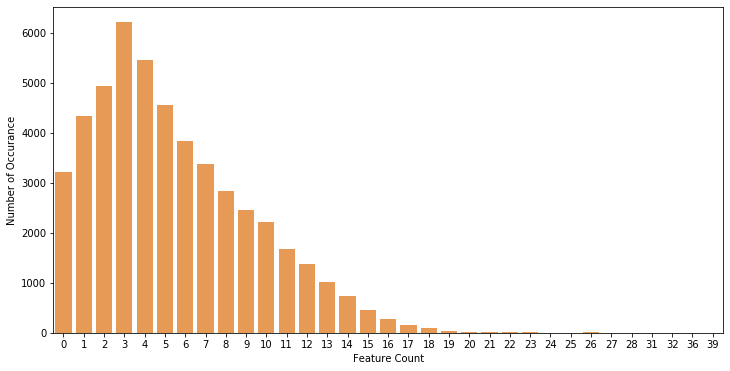

In [0]:
train['features_cnt'] = train['features'].apply(len)
features_cnt = train['features_cnt'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(features_cnt.index, features_cnt.values, alpha=0.8, color=color[1])
plt.xlabel('Features Count')
plt.ylabel('Number of Occurance')
plt.show()

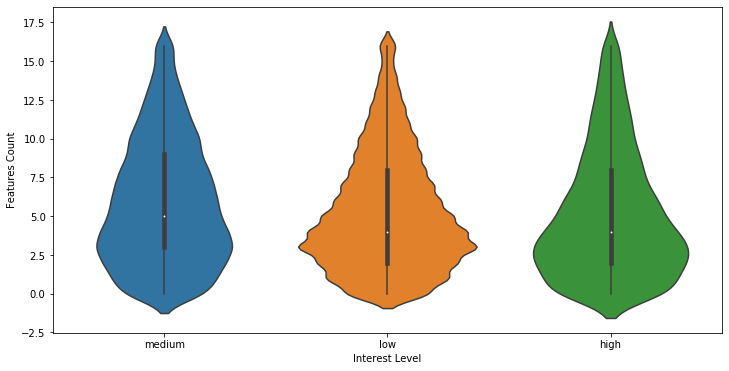

In [0]:
train.loc[train['features_cnt'] > 16, ['features_cnt']] = 16

plt.figure(figsize=(12,6))
sns.violinplot(x='interest_level', y='features_cnt', data=train)
plt.xlabel('Interest Level')
plt.ylabel('Features Count')
plt.show()

## بررسی عملکرد الگوریتم‌های مختلف روی این مجموعه‌ی داده
&#x202b;
در ابتدا من از روش‌های ماشین لرنینگی که در پروژه‌ی ۵ یادگرفتیم استفاده می‌کنم و سپس به سراغ روش شبکه‌ی عصبی می‌روم.

### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [0]:
def prepare_data(df):
  fearures = ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price',
         'photos_cnt', 'features_cnt', 'description_words_cnt']
        # unuseful features: ['created_year', 'created_month', 'created_day'] 
  df['photos_cnt'] = df['photos'].apply(len)
  df['features_cnt'] = df['features'].apply(len)
  df['description_words_cnt'] = df['description'].apply(lambda x: len(x.split(' ')))
  df['created'] = pd.to_datetime(df['created'])
  df['created_year'] = df['created'].dt.year
  df['created_month'] = df['created'].dt.month
  df['created_day'] = df['created'].dt.day
  return df[fearures]

In [0]:
X = prepare_data(train)
Y = train['interest_level']

In [0]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.20)

In [0]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)
y_val_pred = rf.predict_proba(x_val)
log_loss(y_val, y_val_pred)

0.642857108942262

In [0]:
x_test = prepare_data(test)
y_test_pred = rf.predict_proba(x_test)
y_test_pred

array([[0.144179  , 0.52266721, 0.33315379],
       [0.303625  , 0.4195    , 0.276875  ],
       [0.03869048, 0.84883333, 0.11247619],
       ...,
       [0.06433333, 0.69547143, 0.24019524],
       [0.26065238, 0.24147381, 0.49787381],
       [0.05161667, 0.71776667, 0.23061667]])

In [0]:
labels = {label: i for i, label in enumerate(rf.classes_)}
labels

{'high': 0, 'low': 1, 'medium': 2}

تولید خروجی


In [0]:
sub = pd.DataFrame()
sub['listing_id'] = test['listing_id']
for label, index in labels.items():
    sub[label] = y_test_pred[:, index]
sub.to_csv("submission_rf.csv", index=False)

### K Nearest Neighbor

In [0]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [20, 50, 100, 200, 500, 1000]
for n in neighbors:
  neigh = KNeighborsClassifier(n_neighbors=n)
  neigh.fit(x_train, y_train)
  y_val_pred = neigh.predict_proba(x_val)
  print('for neighbors:', n, 'loss:', log_loss(y_val, y_val_pred))

for neighbors: 20 loss: 1.2439314660785914
for neighbors: 50 loss: 0.835643396416015
for neighbors: 100 loss: 0.7537299171228554
for neighbors: 200 loss: 0.7304984763404081
for neighbors: 500 loss: 0.730544067626161
for neighbors: 1000 loss: 0.7302005912571943


### Logistic Regression


In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_val_pred = lr.predict_proba(x_val)
log_loss(y_val, y_val_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7107140205649756

### SVM

In [0]:
from sklearn.svm import SVC

clf = SVC(gamma='scale')
clf.fit(x_train, y_train)
y_val_pred = neigh.predict_proba(x_val)
log_loss(y_val, y_val_pred)

0.7302005912571943

### Nerual Network
&#x202b;
در این قسمت من یک شبکه‌ی عصبی ایجاد می‌کنم که احتمال مورد نظر را درسه کانال خروجی محاسبه کند: 

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

classes = {'high': 0, 'low': 1, 'medium': 2}

In [0]:
class TwoSigmaNet(nn.Module):
    def __init__(self, n_in=8, n_hidden=20, n_out=3):
        super(TwoSigmaNet, self).__init__()
        self.n_in  = n_in
        self.n_hidden = n_hidden
        self.n_out = n_out
         
        self.fc1 = nn.Linear(self.n_in, self.n_hidden)
        self.fc2 = nn.Linear(self.n_hidden, self.n_out)
        self.actv = nn.LogSoftmax(dim=1)
    
    def forward(self,x):
        x = torch.sigmoid(self.fc1(x))
        x = self.actv(self.fc2(x))
        return x

In [0]:
from sklearn import preprocessing

class DataseTwoSigma(Dataset):
    
    def __init__(self, data, label=None):
        std_scale = preprocessing.StandardScaler().fit(data)
        data_norm = std_scale.transform(data)
        pd_data = pd.DataFrame(data_norm, index=data.index, columns=data.columns)
        self.data = pd_data.values
        if label != None:
            self.label = label.apply(lambda l: classes[l]).values
        else:
            self.label = None
        self.len = pd_data.shape[0]
        
    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        row = self.data[index]
        if self.label != None:
            label = self.label[index]
            return torch.Tensor(row), label
        else:
            return torch.Tensor(row)

In [0]:
batch_size = 16
train_dataset = DataseTwoSigma(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=2)
val_dataset = DataseTwoSigma(x_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=2)

نمونه‌ی نرمال شده‌ی داده‌ها

In [0]:
train_dataset[5:10]

(tensor([[-0.4245, -0.4887,  0.0739, -0.0169, -0.0293,  0.1084, -0.6188, -0.0194],
         [-0.4245,  1.3049,  0.0785,  0.0070, -0.0556,  0.1084, -0.6188, -0.7952],
         [-0.4245, -1.3855,  0.0599, -0.0204, -0.0587, -0.7165, -0.6188,  0.1324],
         [ 1.5725,  1.3049, -0.0125, -0.0219,  0.0659,  0.9333,  0.1422,  3.4043],
         [-0.4245, -0.4887,  0.0347, -0.0243, -0.0274, -1.5414, -0.1114, -1.5035]]),
 array([1, 2, 1, 1, 1]))

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda


In [0]:
net = TwoSigmaNet().to(device)

In [0]:
import torch.optim as optim

# criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01, weight_decay=1e-4)

In [0]:
def accuracy_score(net):
  correct = 0
  total = 0
  with torch.no_grad():
      for data in val_loader:
          images, labels = data[0].to(device), data[1].to(device)
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  return (100 * correct / total)

In [0]:
import datetime

def train_net(net, criterion, optimizer, batch_size=batch_size):
  start = datetime.datetime.now()
  log_counter = (len(train_dataset) // batch_size) // 5
  loss_aggrigate = []
  for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
      # get the inputs; data is a list of [inputs, labels]
      inputs, labels = data[0].to(device), data[1].to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward + backward + optimize
      outputs = net(inputs)
#       print('labels', labels)
#       print('outputs', outputs)

      loss = criterion(outputs, labels)

      loss.backward()
      optimizer.step()

      # print statistics
      running_loss += loss.item()
      loss_aggrigate.append(loss.item())
      if i % log_counter == log_counter-1:    # print on each log counter
          print('[e:%d, b:%4d, d:%5d] loss: %.3f' %
                (epoch + 1, (i + 1), (i + 1) * batch_size, running_loss / log_counter))
          running_loss = 0.0

  end = datetime.datetime.now()
  print('Finished Training After', end-start)

In [0]:
print('Start training')
train_net(net, criterion, optimizer)

accuracy = accuracy_score(net)
print('Accuracy: %d %%' % accuracy)

Start training
[e:1, b: 493, d: 7888] loss: 0.780
[e:1, b: 986, d:15776] loss: 0.722
[e:1, b:1479, d:23664] loss: 0.704
[e:1, b:1972, d:31552] loss: 0.709
[e:1, b:2465, d:39440] loss: 0.717
[e:2, b: 493, d: 7888] loss: 0.718
[e:2, b: 986, d:15776] loss: 0.692
[e:2, b:1479, d:23664] loss: 0.686
[e:2, b:1972, d:31552] loss: 0.693
[e:2, b:2465, d:39440] loss: 0.703
[e:3, b: 493, d: 7888] loss: 0.708
[e:3, b: 986, d:15776] loss: 0.681
[e:3, b:1479, d:23664] loss: 0.679
[e:3, b:1972, d:31552] loss: 0.686
[e:3, b:2465, d:39440] loss: 0.698
[e:4, b: 493, d: 7888] loss: 0.704
[e:4, b: 986, d:15776] loss: 0.677
[e:4, b:1479, d:23664] loss: 0.676
[e:4, b:1972, d:31552] loss: 0.683
[e:4, b:2465, d:39440] loss: 0.695
[e:5, b: 493, d: 7888] loss: 0.701
[e:5, b: 986, d:15776] loss: 0.675
[e:5, b:1479, d:23664] loss: 0.674
[e:5, b:1972, d:31552] loss: 0.681
[e:5, b:2465, d:39440] loss: 0.694
Finished Training After 0:00:55.867416
Accuracy: 69 %


&#x202b;
شبکه‌ی عصبی را با توابع فعال‌سازی مختلف امتحان کردم ولی بهبودی حاصل نشد.

In [0]:
factv = {'relu': F.relu, 'leaky_relu': F.leaky_relu, 'tanh': torch.tanh, 'softplus': F.softplus}
accuracy = []
times = []
for key, actv in factv.items():
  start = datetime.datetime.now()
  
  net = TwoSigmaNet(activation_function=actv).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
  
  print('Start training for network with activation function', key)
  train_net(net, criterion, optimizer)
  
  accuracy = accuracy_score(net)
  print('Accuracy: %d %%' % accuracy)
  
  end = datetime.datetime.now()
  times.append(end - start)

&#x202b;
در نهایت دقت شبکه‌ی عصبی به جنگل تصادفی نرسید و من بهترین جواب را در آن قسمت گرفتم.

In [0]:
X = prepare_data(test)
test_dataset = DataseTwoSigma(X)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=2)

In [0]:
len(test)

74659

In [0]:
sub = pd.DataFrame()
sub['index'] = [i for i in range(test.shape[0])]
sub['listing_id'] = test['listing_id']
sub['high'] = test['listing_id']
sub['low'] = test['listing_id']
sub['medium'] = test['listing_id']

counter = 0
net.to(device)
with torch.no_grad():
    for data in test_loader:
        images = data.to(device)
        outputs = net(images)
        worst, _ = torch.min(outputs.data, 1)
        predicted = (outputs - torch.Tensor([[w, w, w] for w in worst]).to(device)).to('cpu')
        
        for row in predicted:
            sub.loc[counter, classes.keys()] = row.numpy()
            counter += 1
                
sub.to_csv("submission_rf.csv", index=False)

In [0]:
!jupyter nbconvert --to html gdrive/My\ Drive/Colab\ Notebooks/Two_Sigma_Connect.ipynb

[NbConvertApp] Converting notebook gdrive/My Drive/Colab Notebooks/Two_Sigma_Connect.ipynb to html
[NbConvertApp] Writing 780220 bytes to gdrive/My Drive/Colab Notebooks/Two_Sigma_Connect.html


In [0]:
!jupyter nbconvert --to script gdrive/My\ Drive/Colab\ Notebooks/Two_Sigma_Connect.ipynb

[NbConvertApp] Converting notebook gdrive/My Drive/Colab Notebooks/Two_Sigma_Connect.ipynb to script
[NbConvertApp] Writing 13768 bytes to gdrive/My Drive/Colab Notebooks/Two_Sigma_Connect.txt
